# Project: **Interpolation** in **Blender 3D Animation Modeling**

## Group members
* Kwesi Obika - Wrote the runge.py modeling script
* Warren Fulton - Contributed in writing the introduction and about software usage
* Gustav Solis - Wrote cubic.py and rendered two models in Blender. Contributed in writing conclusion
* Justin Deng -  Runge's Phenomenon and the failure of Lagrange Interpolation, Bezier curve and the Bernstein polynomial, Bezier curve vs Lagrange Interpolation 


## Introduction

Objective - Model a given function with different methods of interpolation. 


For our project we continued on the open source 3D animation sofwater, Blender. Blender allows us to create linear, quadratic, and higher order curves using things called Bezier curves and Bezier splines. 

To create a Bezier curve requires a series of control/anchor points that model a "path" that the curve will take as shown below:

In [82]:
%%html
<img src = ./breziercurve.png>

Here the path is specified by the control points $P_{0}, P_{1}, P_{2}, \text{ and }P_{3}$, while $t=\text{ step size between } R_{0} \text{ and } R_{1}$, and the red curve is the resulting Bezier spline. The main elements used in editing Bezier curves are the control points (points $P_{i}$) and the handles, which are the lines generated by $[Q_{0}, Q_{1}], [Q_{1}, Q_{2}], \text{ and } [R_{0}, R{1}]$. The handles move along specified path, while the point $B$ maps out the desired curve.

## Method

In our project we will create some of these Bezier splines to model the runge phenomenon of interpolation given by the following function.

$$f(x) = \frac{1}{1 + 10x^{2}}$$

If you look in the runge.py script we first create alinear space of 20 points between -1 and 1, these are the points we are trying to interpolate between. 

The bulk of the modeling is done in the following code block of runge.py

In [83]:
#The Following block will not run in this enviroment.

x = np.linspace(-1,1,20)	

ops.curve.primitive_bezier_curve_add(enter_editmode=True)
ops.curve.subdivide(number_cuts=18)

curve = context.active_object

bz_pts = curve.data.splines[0].bezier_points

len(bz_pts)
#20

for i in range(0,20):
    bz_pts[i].co = Vector((x[i], runge1(x[i]), 0.0))
    bz_pts[i].handle_left = Vector((0.0, 0.0, 0.0))
    bz_pts[i].handle_right = Vector((0.0, 0.0, 0.0))

NameError: name 'ops' is not defined

This sets all values of $f(x)$ above as the control points throughout the shape, and every control points handle's are centered at the origin. If we render the Bezier spline defined by these control points we get the following shape.

In [1]:
%%html
<img src = ./runge.jpg>

We can see that splines are beginning to model the function shape overall, however, since we have such few points to interpolate from we get spikes at every control point. But, if we can give it more points we can begin to smooth the shape out. 

For instance, lets see what happens when we give it a 1000 points instead of 20.

In [85]:
%%html
<img src = ./runge1000.png>

Here we can see that giving the Brezier spline more points to interpolate from allows it to more accurately model the given function, $f(x)$, obviously.

## Runge's Phenomenon and the failure of Lagrange Interpolation

  Runge's phenomenon refers to the oscillation that occurs near the ends of a given interval of an interpolating function. In this section we will be demonstrating the diverging error that may occcur when using a interpolant found with Lagrange Interpolation of the given funtion:
  
  $$f(x) = \frac{1}{1+10x^{2}}$$

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np


def f(x):
    denominator = 1 + 10* x**2
    y_value = 1/denominator
    return y_value

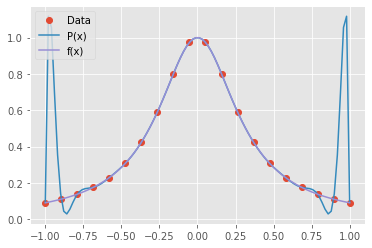

In [87]:
def y_values(x):
    num_points = x.size
    y_values = np.zeros(num_points)
    for i in range(num_points):
        y_values[i] = f(x[i])
    return y_values

def lagrange(x, y):
    @np.vectorize
    def p(t):
        from numpy import prod
        m = len(x) - 1
        w = 0
        for i in range(m):
            w += y[i] * (prod(t - x[:i]) * prod(t - x[i+1:])
                         / (prod(x[i] - x[:i]) * prod(x[i] - x[i+1:])))
        w += y[m] * prod(t - x[:m]) / prod(x[m] - x[:m])
        return w
    return p

def plotFunctionWitGivenPoints(n_points):
    x = x = np.linspace(-1,1,n_points)
    y = y_values(x)
    p = lagrange(x,y)
    
    
    x_0 = np.linspace(-1,1,100)
    plt.plot(x,y,'o',label='Data')
    plt.plot(x_0,p(x_0),label='P(x)')
    plt.plot(x_0,y_values(x_0), label='f(x)')
    plt.legend(loc='upper left');
    
    y_0 = y_values(x_0)
    error = np.zeros(x_0.size)
    total_error = 0
    for i in range(x_0.size):
        numerator =  p(x_0[i]) - y_0[i]
        error[i]= np.abs(numerator/p(x_0[i])) * 100
        total_error += error[i]
    return p,error, total_error

p,error,total_error = plotFunctionWitGivenPoints(20)

x_0 = np.linspace(-1,1,100)


average_error = total_error / x_0.size



Average Error: 20.525263324264657


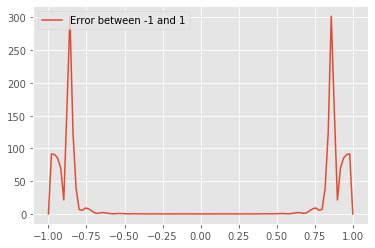

In [88]:
plt.plot(x_0, error,label='Error between -1 and 1')
plt.legend(loc='upper left');
print('Average Error:', average_error)

 If we take a look a the graph we notice that error of p(x) is mostly minimal, but from the interval $[-1,-0.75 ) \cup ( 0.75,1]$ the error is astronomically high. The error along this interval is so high that it inflates the average error to around 20.53. Coinidentally, this is where the oscillation occurs.
 
 Runge's concluded that higher order interpolation may not always be the appropriate form to interpolate a given dataset.
 

Average Error: 12.599958644830817


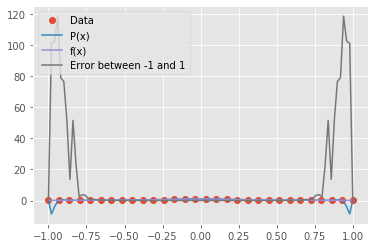

In [89]:
p,error,total_error = plotFunctionWitGivenPoints(30)
average_error = total_error / x_0.size
plt.plot(x_0, error,label='Error between -1 and 1')
plt.legend(loc='upper left');
print('Average Error:', average_error)

When we increase the number of points, and the degree of the interpolating curve increases, the average error of $p(x)$ seems to decrease.

Average Error: 60.49256664356021


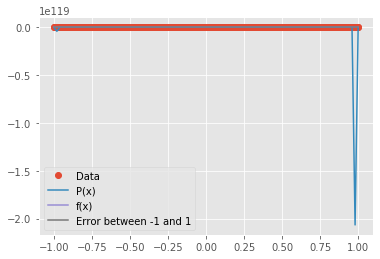

In [99]:

p,error,total_error = plotFunctionWitGivenPoints(500)
average_error = total_error / x_0.size
plt.plot(x_0, error,label='Error between -1 and 1')
plt.legend(loc='lower left');
print('Average Error:', average_error)

However, when we increase the number of points to 500, the average error grows to about 60. This maybe evidence to suggest that the error of 
diverges as the degree of the interpolating polynomial grows with no bound.

In conclusion, there may not be a suitable interpolating polynomial that can model f(x) with a small error found with Lagrange Interpolation, but that does not mean that we are out of luck. 

##  Bezier curve and the Bernstein polynomial

   I present the Bezier curve as a solution to modeling this function. Bernstein polynomials can be used to evaluate every polynomial within a closed interval. Given a set of data points we can evaluate the polynomials that pass through evey single point and choose the interpolating curve that has the smallest error. This is a brute-force method and thus can be computationally taxing routine. 

Using Blender, we experience fairly high render times of the our interpolating curve. We suspect that the render times were closely related to heavy cost of this routine, but no conclusion can be drawn; we don't know what the largest factor in render time is. As expected, when we increased the number of points to 1000 the render time did increase.

While we don't know exactly how Blender utilizes the Bezier curve, we do know that the software is evaluating Bernstein polynomials restricted to the interval $[0,1]$


##  Bezier curve vs Lagrange Interpolation 

$$f(x) = \frac{1}{1-25 x^{3}}$$


We will now find the interpolating polynomial with Lagrange's and compare it to a render from Blender.

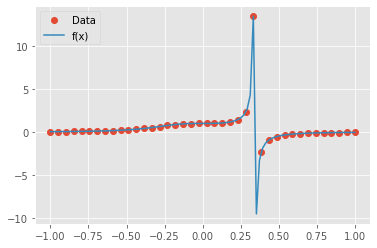

In [100]:
def f2(x):
    denominator = 1 - 25* x**3
    y_value = 1/denominator
    return y_value

def y_values2(x):
    num_points = x.size
    y_values = np.zeros(num_points)
    for i in range(num_points):
        y_values[i] = f2(x[i])
    return y_values


def plotFunctionWithGivenPoints2(n_points):
    x = x = np.linspace(-1,1,n_points)
    y = y_values2(x)
    p = lagrange(x,y)
    
    
    x_0 = np.linspace(-1,1,100)
    plt.plot(x,y,'o',label='Data')
    #plt.plot(x_0,p(x_0),label='P(x)')
    plt.plot(x_0,y_values2(x_0), label='f(x)')
    plt.legend(loc='upper left');
    
    y_0 = y_values(x_0)
    error = np.zeros(x_0.size)
    total_error = 0
    for i in range(x_0.size):
        numerator =  p(x_0[i]) - y_0[i]
        error[i]= np.abs(numerator/p(x_0[i])) * 100
        total_error += error[i]
    return p,error, total_error

p, error, total_error = plotFunctionWithGivenPoints2(40)
x_0 = np.linspace(-1,1,100)

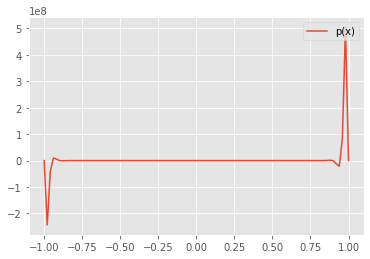

In [101]:
average_error = total_error / x_0.size
plt.plot(x_0, p(x_0), label='p(x)')
plt.legend(loc='upper right');

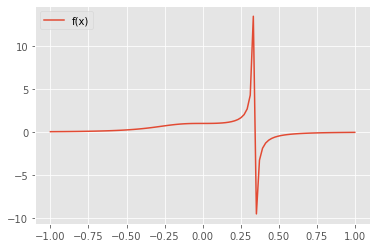

In [102]:
plt.plot(x_0, y_values2(x_0),label='f(x)')
plt.legend(loc='upper left');

In [107]:

%%html
<img src = ./cubic.png width="312" height="410">


The model created with Bezier Curve closely resembles the original function, but the interpolating polynomial found with Lagrange Interpolation does not model the original function well.

Average Error: 78.44208172330868


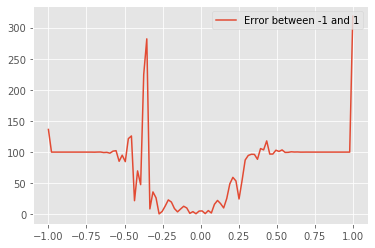

In [104]:
plt.plot(x_0, error,label='Error between -1 and 1')
plt.legend(loc='upper right');
print('Average Error:', average_error)


The average error of this polynomial is about 78. There are only a few values with errors close to zero.

## Conclusion

Blender proved to be a super fun and useful tool for visualizing some of these complicated curves in an alternate way, however it wasn't perfect. Some models proved challenging to render, and some functions we attempted to model were downright inaccurate. Though we tested the boundaries of this software, we weren't able to conclude why it failed on certain instances. 

 ### Sources Used:
            "On the Runge Example" by, James Epperson // DOI:10.2307/2323093
            
            http://www.tlu.ee/~tonu/Arvmeet/Runge's%20phenomenon.pdf
            
            https://demonstrations.wolfram.com/RungesPhenomenon/
            
            http://web.mit.edu/hyperbook/Patrikalakis-Maekawa-Cho/node12.html
            
            https://www.encyclopediaofmath.org/index.php/Bernstein_interpolation_method
            
            https://medium.com/@behreajj/scripting-curves-in-blender-with-python-c487097efd13